In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

#### Part 1 - Data preparation

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\ETC\Technical\Notebooks\Medical Insurance\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#checking for nulls and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking the data we have in the described data frame, we can see the following in charges column:
   - The minimum value is 1121.87
   - The maximum value is 63770.42
   - The mean value is 13270.42
   
Comparing the min and max of the values with the mean, we can say the the maximum value is already an outlier.

To check:

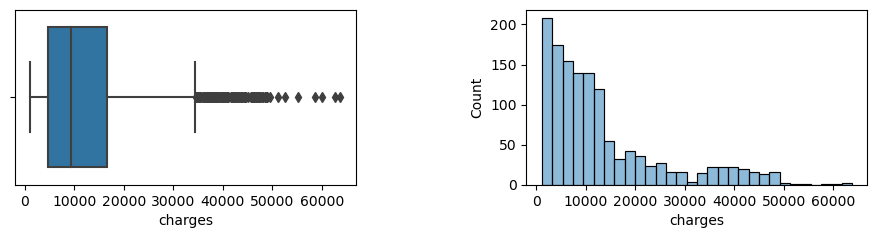

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(11,5))
plt.subplot(2, 2, 1)
sns.boxplot(x='charges', data=df)

plt.subplot(2, 2, 2)
sns.histplot(x=df.charges, alpha=0.5)

plt.subplots_adjust(wspace = 0.5)
plt.show()
plt.clf()

75th percentile falls below 20000 and histplot is right-skewed clearly showing outliers.

#### Part 1.2 - Removing the outliers 

In [6]:
#calculating the 25th and 75th percentile
percentiles =np.percentile(df.charges, [25, 75])

#setting lower range and upper range for charge values
IQR = percentiles[1] - percentiles[0]
upper_range = percentiles[1] + (1.5*IQR)
lower_range = percentiles[0] - (1.5*IQR)
print(upper_range, lower_range)

34489.350562499996 -13109.1508975


In [7]:
#creating a category for age bracket
df['age_category']=df.age.apply(lambda count: 'Below_20' if count < 20 else 
                                  ('In_20s' if (count >= 20) & (count < 30) else 
                                   ('In_30s' if (count >= 30) & (count < 40) else
                                    ('In_40s' if (count >= 40) & (count < 50) else
                                     ('In_50s' if (count >= 50) & (count < 60) else 'Above_60')))))
df_sorted = df.sort_values('age')

In [8]:
#creating a new variable without outliers
df_fixed = df[(df.charges < 35000) & (df.charges > 0)]
df_fixed2 = df_fixed.sort_values('age')
df_fixed2.head()

,age,sex,bmi,children,smoker,region,charges,age_category
354,18,female,38.280,0,no,southeast,14133.03775,Below_20
1033,18,male,21.565,0,yes,northeast,13747.87235,Below_20
1023,18,male,23.320,1,no,southeast,1711.02680,Below_20
359,18,female,20.790,0,no,southeast,1607.51010,Below_20
369,18,male,30.400,3,no,northeast,3481.86800,Below_20


#### Part 2 - Data Visualization 

Just for reference, we will visualize the effect of outliers in our data set.

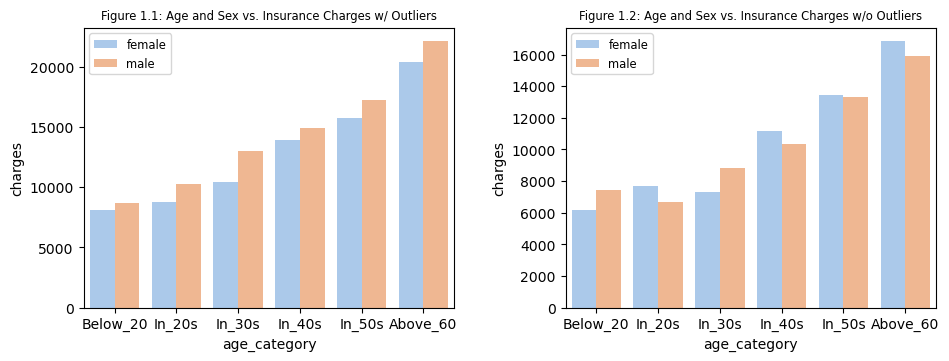

<Figure size 640x480 with 0 Axes>

In [9]:
#plotting age vs charges with and without outliers
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x='age_category', y='charges', data=df_sorted, 
            hue=df_sorted.sex, palette='pastel', ci=None)
plt.legend(loc='upper left', fontsize = 'small')
plt.title('Figure 1.1: Age and Sex vs. Insurance Charges w/ Outliers', fontsize='small')

plt.subplot(2,2,2)
sns.barplot(x='age_category', y='charges', data=df_fixed2, 
            hue=df.sex, palette='pastel', ci=None)
plt.legend(loc='upper left', fontsize = 'small')
plt.title('Figure 1.2: Age and Sex vs. Insurance Charges w/o Outliers', fontsize='small')

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.clf()

The figure with out shows a constant increase in charges for both male and female in contrast to the figure without outliers that displays a varying difference for incrementing charges. Deciding to remove outliers or not will impact the information delivered in our analysis.

Later, we will discuss the importance of outliers in our correlation.

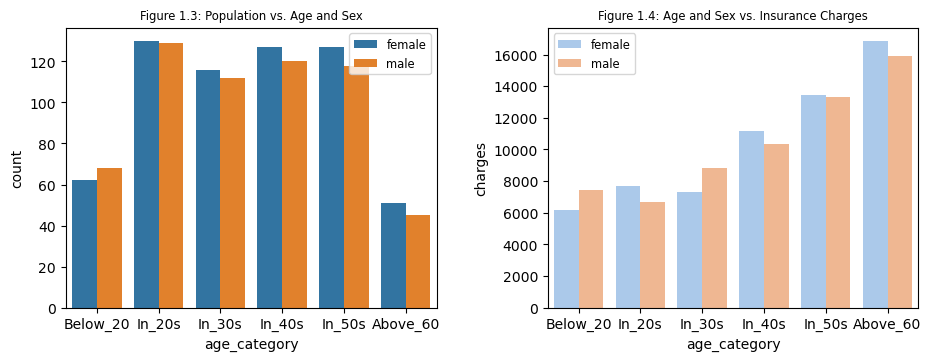

<Figure size 640x480 with 0 Axes>

In [10]:
#plotting the subjects in the within the data set population and also in terms of charges
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.countplot(x='age_category', data=df_fixed2, hue='sex')
plt.legend(loc='upper right', fontsize = 'small')
plt.title('Figure 1.3: Population vs. Age and Sex', fontsize='small')

plt.subplot(2,2,2)
sns.barplot(x='age_category', y='charges', data=df_fixed2, 
            hue=df.sex, palette='pastel', ci=None)
plt.legend(loc='upper left', fontsize = 'small')
plt.title('Figure 1.4: Age and Sex vs. Insurance Charges', fontsize='small')

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.clf()

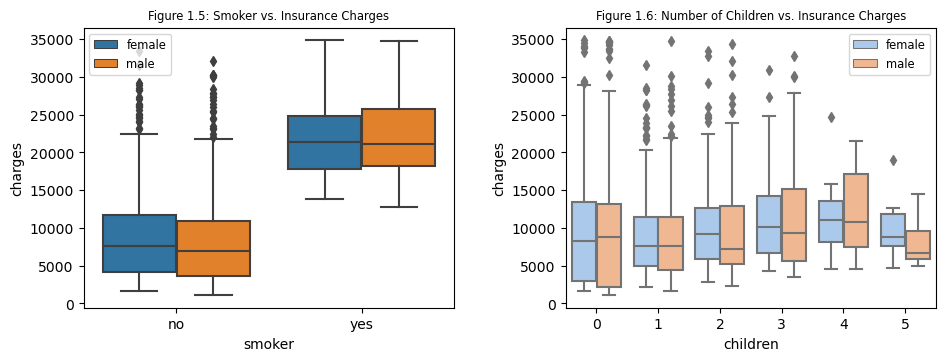

<Figure size 640x480 with 0 Axes>

In [11]:
#plotting the relationships of being a smoker and number of children to charges
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.boxplot(x='smoker', y='charges',data=df_fixed2, hue='sex')
plt.legend(loc='upper left', fontsize = 'small')
plt.title('Figure 1.5: Smoker vs. Insurance Charges', fontsize='small')

plt.subplot(2,2,2)
sns.boxplot(x='children', y='charges', data=df_fixed2, 
            hue=df.sex, palette='pastel')
plt.legend(loc='upper right', fontsize = 'small')
plt.title('Figure 1.6: Number of Children vs. Insurance Charges', fontsize='small')

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.clf()

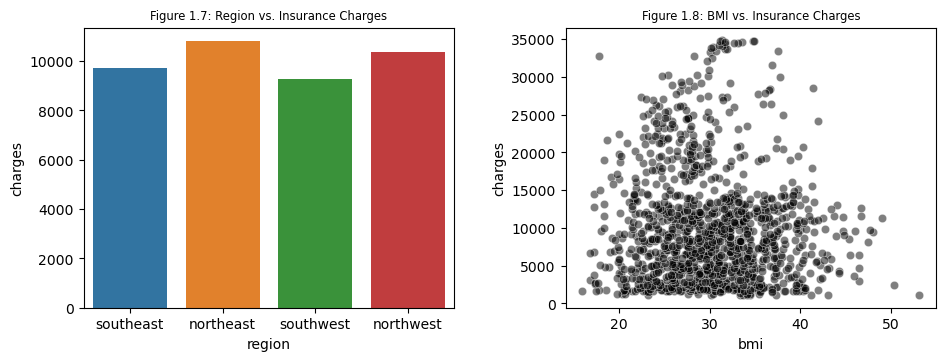

<Figure size 640x480 with 0 Axes>

In [12]:
#plotting the relationships between region and BMI to charges
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x='region', y='charges',data=df_fixed2, ci=None)
plt.title('Figure 1.7: Region vs. Insurance Charges', fontsize='small')


plt.subplot(2,2,2)
sns.scatterplot(x='bmi', y='charges', data=df_fixed2, 
             color = 'black', alpha = 0.5)
plt.title('Figure 1.8: BMI vs. Insurance Charges', fontsize='small')

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.clf()

In [13]:
#Further checking with the proportion of subjects per region is not biased
print(np.sum(df_fixed2.region == 'southeast') / len(df_fixed2.region))
print(np.sum(df_fixed2.region == 'northeast') / len(df_fixed2.region))
print(np.sum(df_fixed2.region == 'southwest') / len(df_fixed2.region))
print(np.sum(df_fixed2.region == 'northwest') / len(df_fixed2.region))

0.2564315352697095
0.24647302904564317
0.24398340248962655
0.25311203319502074


#### Findings:
 - Majority of people who avail insurance are within the age bracket 20 to 50 years old, which probably are still employed.
 - Insurance cost have a positive correlation with increasing age.
 - Being a smoker have more insurance cost than a non-smoker.
 - A gradual increase in cost for from hacing 2 to 4 children and decrease for having 5.
 - The location does not really affect our insurance cost with a fair amount of regional distribution in our population.
 - Scatter plot shows a low correlation with BMI as the cost for insurance are packed below 15000 range at increasing BMI.

#### Further investigation
Our visualizations above shows findings and correlation between a single variable and our dependent variable insurance charge. But this is not actually the case due to the fact that all of these independent variables contributes to the calculation of our dependent variable and showing a single plot for all these would lead to an uninterpretable visualization. 

In other words, we need to actually come up with a correlation and insurance cost calculation that includes all of these variables. In this analysis, we will be using predictive analysis using regression to formulate a mathematical equation that will fit our data.

#### Part 3 - Multiple Linear Regression

In [14]:
#setting our x and y variables
df_new = df_fixed2.drop(columns = 'age_category')
train_set = df_new.replace(['female', 'male', 'yes', 'no'], 
                               [0, 1, 1, 0])
train_set['region'] = train_set['region'].astype('category')
train_set['region'] = train_set['region'].cat.codes

x = train_set.drop(columns = 'charges')
y = df_fixed2['charges']

#Splitting our data set into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 0)

#Setting our model as linear regression and fitting our train set to our model
model = LinearRegression()
model.fit(x_train, y_train)

# print(x)

LinearRegression()

In [15]:
#checking correlations between independent variables to dependent variable
train_set.corr()['charges']

age         0.405085
sex        -0.012245
bmi        -0.056817
children    0.068704
smoker      0.619600
region     -0.078058
charges     1.000000
Name: charges, dtype: float64

The numbers above shows how related each variable to charges. Note that these values cannot be summed due to the fact that they are independent and mutually exclusive with each other.

Recall in our visualization, age together with sex have a positive correlation with charges, but the correlation shows that only age have a significant contribution to calculating insurance charge while sex shows a value close to negligible which also happens to be negative. Thus, we will be reporting a false information through our visualization. 

In [16]:
#calculating our coefficients
c = model.coef_
i = model.intercept_

print('Coefficients:', c, '\nIntercept:', i)

Coefficients: [  220.60477334  -204.26475528    72.78699495   369.42610096
 15919.58722793  -426.05834479] 
Intercept: -2351.0737897867384


With the values shown above, the predictive mathematical syntax would be: 

<b>y = 220.60x1 - 204.26x2 + 72.78x3 + 369.42x4 +  15919.58x5 - -426.05x6 - -2555.33</b>

where: 
- x1 = age 
- x2 = sex 
- x3 = bmi 
- x4 = children 
- x5 = smoker 
- x6 = region

Moving forward, let us try to predict our values in our training set and compare.

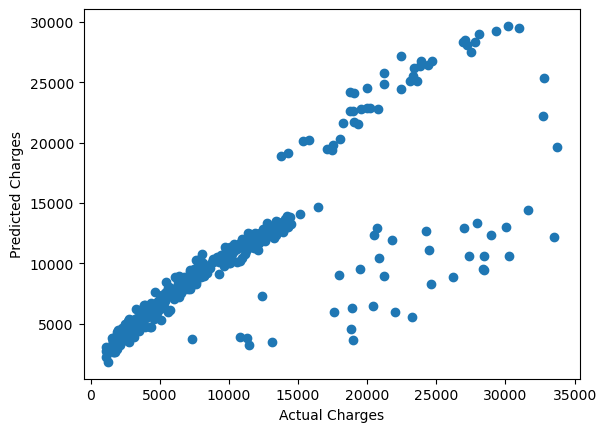

In [17]:
y_pred_test= model.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

This plot compares the actual charges in our data versus the predicted values in our testing samples. Majority of our correct predictions falls below the 20,000 margin. To further check, we will be using MSE(mean absolute error) to see how far off our values to the actual.

In [18]:
mean_absolute_error(y_test, y_pred_test)

2660.644633818692

This number shows the average absolute error we have compared to the values in our data.

Lastly, for our checking, we need to find the R-squared score to determine how good our model in predicting our insurance charge.

In [19]:
r2_score(y_test, y_pred_test)

0.6125518951876574

This explains that 61.25% of our regression model or our mathematical syntax fits the data set and explain the variations in our variables.

(Having the outliers included in our data set will increase the R-squared score up to 79% with a high correlation for smoker data)

#### Additional Findings

The smoker set provides the highest contribution in calculating the insurance charge based on the correlation values. We will try to define amount expectation using the two relationship.

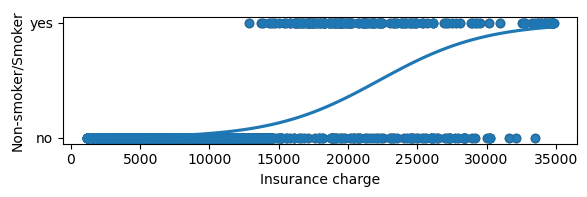

In [20]:
#Plotting our smoker column versus the charges
plt.figure(figsize=(6,2))
plt.scatter(x='charges', y='smoker', data=df_fixed2, edgecolor='black', linewidth=1, alpha=0.75)
plt.xlabel('Insurance charge')
plt.ylabel('Non-smoker/Smoker')

#changing our data smoker to int
log_data = df_fixed2.drop(columns = ['bmi', 'age', 'region', 'children', 'sex'])
log_data['smoker'] = log_data['smoker'].astype('category')
log_data['smoker'] = log_data['smoker'].cat.codes

x = df_fixed2['charges'].values
y = log_data['smoker'].values
sns.regplot(x=x, y=y, data=df_fixed2, logistic=True, ci=None)
plt.tight_layout()
plt.show()

In [21]:
#Setting the variables x and y into a multidimensional array using numpy.
x1 = np.array(log_data.charges.values).reshape(-1,1)
y1 = np.array(log_data.smoker.values)

#Splitting our samples for testing and training.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.1) 
model1 = LogisticRegression()
model1.fit(x1_train, y1_train)

LogisticRegression()

In [22]:
model1.predict(np.array([30000]).reshape(-1,1))
model1.predict(x1_test)
model1.predict_proba(np.array([range(20000,30000,1000)]).reshape(-1,1))

array([[0.64215972, 0.35784028],
       [0.57993391, 0.42006609],
       [0.51505891, 0.48494109],
       [0.44967242, 0.55032758],
       [0.38597985, 0.61402015],
       [0.32596527, 0.67403473],
       [0.27116122, 0.72883878],
       [0.22252929, 0.77747071],
       [0.18045979, 0.81954021],
       [0.14486171, 0.85513829]])

The output presents these probabilities:
- 20,000 -> [0.64020894, 0.35979106]
- 21,000 -> [0.57819782, 0.42180218]
- 22,000 -> [0.51361866, 0.48638134]
- 23,000 -> [0.44858157, 0.55141843]
- 24,000 -> [0.38525671, 0.61474329]
- 25,000 -> [0.32559284, 0.67440716]
- 26,000 -> [0.27109425, 0.72890575]
- 27,000 -> [0.22270543, 0.77729457]
- 28,000 -> [0.18081124, 0.81918876]
- 29,000 -> [0.14532453, 0.85467547]

The 1st column represents the probabilities of being a 0 (non-smoker) while the 2nd represents the probabilities of being a 1 (smoker). Notice that the probabilities in the 1st column are decreasing while the other is increasing.

Taking this into account, we can say the following conclusions:
 1. We can expect minimum cost of approximately 23,000 for being a smoker.
 2. We can expect maximum cost of approximately 22,000 for being a non-smoker.
 3. Recalling Figure 1.5 (Smoker vs. Insurance Charge), our maximum whisker for non-smoker is also around 22,000 while the median of being a smoker would also be around 23,000